In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import geopandas as gpd
import jenkspy
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels
from scipy.stats import pearsonr
import scipy
import prophet
import warnings
warnings.filterwarnings("ignore")
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.colors as colors
import mapclassify
from libpysal.weights.contiguity import Queen
from libpysal import examples
import geopandas as gpd
from esda.moran import Moran_Local
from splot.esda import lisa_cluster

/Users/carmen/anaconda3/envs/geo-env-new/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
font_path = '/Users/carmen/anaconda3/pkgs/r-rmarkdown-2.27-r43hc72bb7e_1/lib/R/library/rmarkdown/rmd/h/bootstrap/css/fonts/RobotoBold.ttf'
font = FontProperties(fname=font_path)


In [19]:
df_tts = pd.read_csv('/Users/carmen/Documents/github/de-bias/DEBIAS_MX/01.Measure_Bias/Measure_Bias_Fb_Tts/Active_population_bias_nonspatial.csv', encoding="latin1")
df_stt = pd.read_csv('/Users/carmen/Documents/github/de-bias/DEBIAS_MX/01.Measure_Bias/Measure_Bias_Fb_Stt/Active_population_bias_nonspatial.csv', encoding="latin1")


In [22]:
df_tts.sort_values(by=['Total_Population']).reset_index(drop=True)
df_stt.sort_values(by=['Total_Population']).reset_index(drop=True)

,Area_code,Area_name,Total_Population,Total_active_population,Bias,Map_bias
0,20521,Santo Domingo Tonaltepec,250,35,0.860000,86.000000
1,20442,Santa María Yalina,250,45,0.820000,82.000000
2,20287,San Miguel Tulancingo,307,22,0.928339,92.833876
3,20151,San Francisco Teopan,312,12,0.961538,96.153846
4,20464,Santiago Ihuitlán Plumas,341,18,0.947214,94.721408
...,...,...,...,...,...,...
2072,15033,Ecatepec de Morelos,1645352,63070,0.961668,96.166778
2073,21114,Puebla,1692181,154168,0.908894,90.889391
2074,11020,León,1721215,136312,0.920805,92.080478
2075,9007,Iztapalapa,1835486,250374,0.863593,86.359253


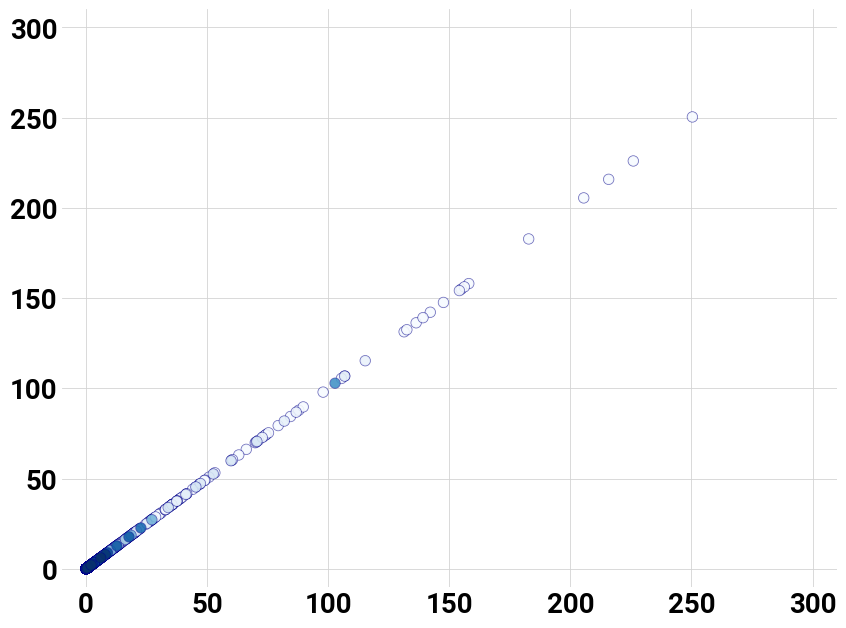

In [30]:
fig, ax = plt.subplots(figsize=(10, 7.5))

viridis = plt.cm.get_cmap('Blues')
norm = plt.Normalize(0, len(df_tts) - 1)   
for i in range(len(df_tts)):
    color = viridis(norm(i)**9)
    ax.scatter(df_tts.loc[i, 'Total_active_population']/1000, df_stt.loc[i, 'Total_active_population']/1000, s=50, alpha=0.6, facecolor="None", edgecolor='darkblue', zorder=i)
    ax.scatter(df_tts.loc[i, 'Total_active_population']/1000, df_stt.loc[i, 'Total_active_population']/1000, s=50, alpha=0.9, c=color, edgecolor="None", zorder=i)


ax.set_xlim([-10, 310])
ax.set_ylim([-10, 310])

# ax.set_yticks([0.980, 0.985, 0.990, 0.995, 1.000])

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(font)

for x in ax.get_xticks():
    ax.axvline(x, color='lightgray', linewidth=0.6, linestyle='-', zorder=1)
for y in ax.get_yticks():
    ax.axhline(y, color='lightgray', linewidth=0.6, linestyle='-', zorder=1)
    
for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', which='both', width=0, length=0, labelsize=20, pad=3)

plt.savefig('/Users/carmen/Documents/github/de-bias/DEBIAS_MX/manuscript/figures/plots/tts-stt.pdf', bbox_inches='tight')


plt.show()

In [27]:
r, p_value = stats.pearsonr(df_tts['Total_active_population'], df_stt['Total_active_population'])
r2 = r**2

In [28]:
print(r2, p_value)

0.9999999243248491 0.0
